# 多变量最小二乘法


In [1]:
# 需要交互式三维图像请打开
# %matplotlib widget

In [2]:
import utils
import sympy
import matplotlib.pyplot as plt
import numpy as np

utils.use_svg()
sympy.init_printing()

## 多变量问题

现实中的的 $x$ 是个向量，我们可以将其扩展到多变量的情况，假设有 $m$ 个变量，我们有很多采样值 $(x_1, x_2, \cdots, x_m, y)$

那么方程可以表示成如下形式：

$
y = x_1 w_1 + x_2 w_2 + \cdots + x_m w_m = [x_1, x_2, \cdots, x_m] \begin{bmatrix}
    w_1 \\ w_2 \\ \vdots \\ w_m
\end{bmatrix}
$

这里忽略了参数 $b$，是由于有多个变量，我们可以认为最后一个 $w_m$ 是 $b$，只不过 $x_m$ 的 取值是 $1$，这样处理起来会更方便。

假设我们有 $n$ 个采样，问题就变成了，我们需要找到一个向量 $(w_1, w_2, \cdots, w_m)$ 使得下式的值最小：

$$
l = \sum_{i=1}^n\left(y_i - \sum_{j=1}^m w_jx_{i,j}\right)^2
$$

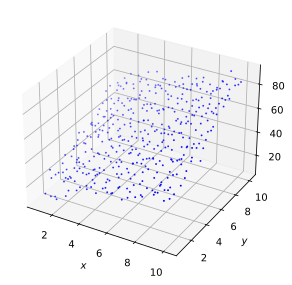

In [3]:
# 我们需要求得的值
W = np.array([3, 5, 7])  # 假设的权重，或者斜率

N = 20  # 观测的样本在每个维度数量

X1, X2 = np.meshgrid(
    np.linspace(1, 10, N),
    np.linspace(1, 10, N),
)

X = np.vstack([X1.flatten(), X2.flatten(), np.ones(N ** 2)]).T
R = np.random.randn(*X.shape) * 0.1  # 加入一些随机误差
R[:, -1] = 0.0  # 最后一维是偏执，全部为 1
X += R

# # 我们观测到具体的值，当然我们的观测有一些误差
Y = (X * W).sum(axis=1) + np.random.randn(X.shape[0]) * 3

# # 下面显示出我们的观测结果，我们观测得到了这样的一些样本
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, c='blue', s=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

假设我们有 $n$ 个采样值，或者观测值，记

$
\boldsymbol{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix}
$

$
A = \begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1m} \\
x_{21} & x_{22} & \cdots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nm} \\
\end{bmatrix}
$

$
\boldsymbol{w} = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_m \\
\end{bmatrix}
$

方程组就可以表示成

$\boldsymbol{y} = A\boldsymbol{w}$

这里换个最优化问题的理解方式：


- $\boldsymbol{y}$ 是一个向量；
- $A\boldsymbol{w}$ 是 $A$ 列向量的线性组合；
- 我们期望找到 $A$ 列向量的线性组合 $A\bar{w}$ 尽可能的和 $\boldsymbol{y}$ 重合；
- 如果找到 $\boldsymbol{y} = A\bar{w}$，那 $\bar{w}$ 就是最优解；
- 找不到的话，说明 $A$ 列向量与 $\boldsymbol{y}$ 线性无关，无法用 $A$ 列向量的线性组合表示 $\boldsymbol{y}$；
- 于是，$\boldsymbol{y}$ 在 $A\bar{w}$ 超平面之外；
- 我们的目标是，从超平面 $A\boldsymbol{w}$ 找到一个向量 $A\bar{w}$，使得向量 $A\bar{w}$ 与 向量 $\boldsymbol{y}$ 差的 **模长** 最短；

这是由于均方误差可以表示成：

$\displaystyle
l = (\boldsymbol{y} - A\bar{w})^T(\boldsymbol{y} - A\bar{w}) = |\boldsymbol{y} - A\bar{w}|^2  = \sum_{i=1}^n\left(y_i - \sum_{j=1}^m w_jx_{i,j}\right)^2
$

为了求得均方误差最小值，我们希望残差向量的模 $|\boldsymbol{y} - A\bar{w}|$ 最小，那么只有残差向量 $\boldsymbol{y} - A\bar{w}$ 与超平面 $A\boldsymbol{w}$ 相互 **垂直** 时，取得最小值，于是有：

$(\boldsymbol{y} - A\bar{w}) \perp (A\boldsymbol{w})$

可以理解成 $A\boldsymbol{w}$ 构成解超平面，而由于误差，$\boldsymbol{y}$ 是解空间以外的向量，为了使得向量与解空间的距离最短，那我们只好选择垂直的那个向量。


> 最小二乘是以 **正交性** 为基础的；
> 
> 一个点到一个 平面 的最短距离，通过 正交于平面的 直线段 获得；
> 
> 正规方程 是确定直线段位置的计算方法，它表示最小二乘误差；

如下图所示，浅蓝色的平面表示 $A\boldsymbol{w}$ 的解向量空间，红色向量表示 $OC = \boldsymbol{y}$，我们需要从解向量空间中，找到蓝色向量 $\bar{w} = OA$，使得蓝色的残差向量 $AC = \boldsymbol{y} - A\bar{w}$ 的**模长最短**，于是我们只要找到与整个解平面 $A\boldsymbol{w}$ 正交（垂直）的向量 $BC$ 作为残差向量，那么 $OB = \bar{w}$ 就是要找的解；

In [4]:
%%html
<script src="https://cdn.geogebra.org/apps/deployggb.js"></script>
<div id="ggb-element"></div>
<script>
    var ggbApp = new GGBApplet({
        "appName": "3d",
        "height": 600,
        "filename": "./images/geogebra-lse.ggb"
    }, 'ggb-element');
    ggbApp.inject();
</script>

于是有：

$
\begin{aligned}
&(A\boldsymbol{w})^T(\boldsymbol{y} - A\bar{w}) = 0 \\
&\boldsymbol{w}^TA^T(\boldsymbol{y} - A\bar{w}) = 0 \\
\end{aligned}
$


这是说 $A^T(\boldsymbol{y} - A\bar{w})$ 与每个 $\boldsymbol{w}$ 都正交，于是：

$A^T(\boldsymbol{y} - A\bar{w}) = 0$

这就是最小二乘的方正组

$A^T A\bar{w} = A^T \boldsymbol{y}$

此方正组称为 **正规方程**


求解该方正组得到解，显然需要 $A^T A$ 可逆：

$\bar{w} = (A^T A)^{-1}A^T \boldsymbol{y}$


最后我们就得到了目标方程：

$y = \bar{w} x$


于是我们可以很容易的求出 $w$


In [5]:
w = np.linalg.inv((X.T @ X)) @ X.T @ Y
w


array([2.94604456, 4.95292291, 7.66359654])

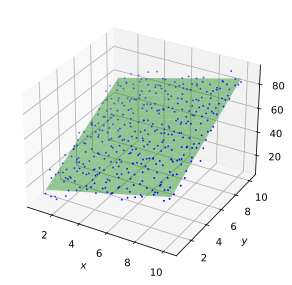

In [6]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, c='blue', s=1)
ax.plot_surface(
    X1, X2, (X1 * w[0] + X2 * w[1] + w[2]),
    alpha=0.4,
    color="green",
)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()


最小二乘是数据压缩的典型例子，输入包括一组数据点而输出是尽可能好地拟合数据的模型，它带有相对少的参数；

通常使用最小二乘的原因是用合理的模型来代替噪声数据，于是，为了信号预测和分类的目的，经常使用这种模型；


## 微分的优化方法

微分的方式可能不好理解，需要一些公式：

$
\begin{aligned}
{\partial \boldsymbol{a}^T\boldsymbol{x} \over \partial \boldsymbol{x}} &= {\partial \boldsymbol{x}^T\boldsymbol{a}\over \partial \boldsymbol{x}} = \boldsymbol{a} \\
{\partial \boldsymbol{x}^TA\boldsymbol{x} \over \partial \boldsymbol{x}} &= (A + A^T)\boldsymbol{x}
\end{aligned} \\
$

定义均方误差并化简：

$
\begin{aligned}
l =& \sum_{i=1}^n (y_i  - \boldsymbol{x}_i\boldsymbol{w})^2 \\
\xlongequal{向量点积的定义}& (\boldsymbol{y} - A\boldsymbol{w})^T(\boldsymbol{y} - A\boldsymbol{w}) \\
=& (\boldsymbol{y}^T - \boldsymbol{w}^TA^T)(\boldsymbol{y} - A\boldsymbol{w}) \\
=& \boldsymbol{y}^T\boldsymbol{y} - \boldsymbol{y}^TA\boldsymbol{w} - \boldsymbol{w}^TA^T\boldsymbol{y} + \boldsymbol{w}^TA^T A\boldsymbol{w} \\
\end{aligned}
$

求微分 ${\partial l \over \partial \boldsymbol{w}}$ 

$
\begin{aligned}
{\partial l \over \partial \boldsymbol{w}} &= 0\ - A^T\boldsymbol{y} - A^T\boldsymbol{y} + (A^TA + (A^TA)^T)\boldsymbol{w} \\
&= - 2A^T\boldsymbol{y} + 2A^TA \boldsymbol{w} \\
&= 2A^T(A\boldsymbol{w} - \boldsymbol{y}) \\
\end{aligned}
$


令 ${dl \over dW}  = 0$，然后和上面的求解方式就相同了；

$
\begin{aligned}
& A^T(\boldsymbol{y} - A\boldsymbol{w}) = 0 \\
& A^T A\boldsymbol{w} = A^T \boldsymbol{y} \\
& \bar{w} = (A^TA)^{-1} A^T \boldsymbol{y} \\
\end{aligned}
$

通过上面向量模长的解释，也可以帮助我们理解微分的操作，以及为什么微分找到的值是最优解；

另外我们还可以再测试一下，更多维的情况：

In [7]:
import pandas as pd

W = np.array([sympy.prime(i) for i in range(1, 10)])
N = W.size * 10
X = np.random.randint(1, 10000, (N, W.size))
Y = np.sum(X * W, axis=1) + np.random.randn(N) * 1000
w = np.linalg.inv((X.T @ X)) @ X.T @ Y

frame = pd.DataFrame([W, w])
frame

,0,1,2,3,4,5,6,7,8
0,2.000000,3.000000,5.000000,7.000000,11.000000,13.000000,17.000000,19.000000,23.000000
1,2.017388,3.040312,4.989814,7.007403,11.016141,12.958986,16.962968,18.969124,23.010102


## 参考

- 索尔. 数值分析[M/OL]. 吴兆金, 王国英, 范红军, 译. <a href="https://book.douban.com/press/2609">人民邮电出版社</a><span><span class="pl"> 译者</span>: <a class="" href="/search/%E5%90%B4%E5%85%86%E9%87%91">吴兆金</a> / <a class="" href="/search/%E7%8E%8B%E5%9B%BD%E8%8B%B1">王国英</a> / <a class="" href="/search/%E8%8C%83%E7%BA%A2%E5%86%9B">范红军</a> </span>, 2010. https://book.douban.com/subject/4188358/.
- 周志华. 机器学习[M/OL]. <a href="https://book.douban.com/press/2562">清华大学出版社</a><span class="pl">出版年:</span> 2016-1-1, 2016. https://book.douban.com/subject/26708119/.
- https://github.com/datawhalechina/pumpkin-book
- https://en.wikipedia.org/wiki/Matrix_calculus
